 pipeline makes simple to keep the data preprocessing and modeling code. A pipeline, in particular, bundles preprocessing and modeling steps so that the entire bundle may be used as if it were a single step. Therefore, use Pipelines is a critical skill for deploying and testing complex models with pre-processing.

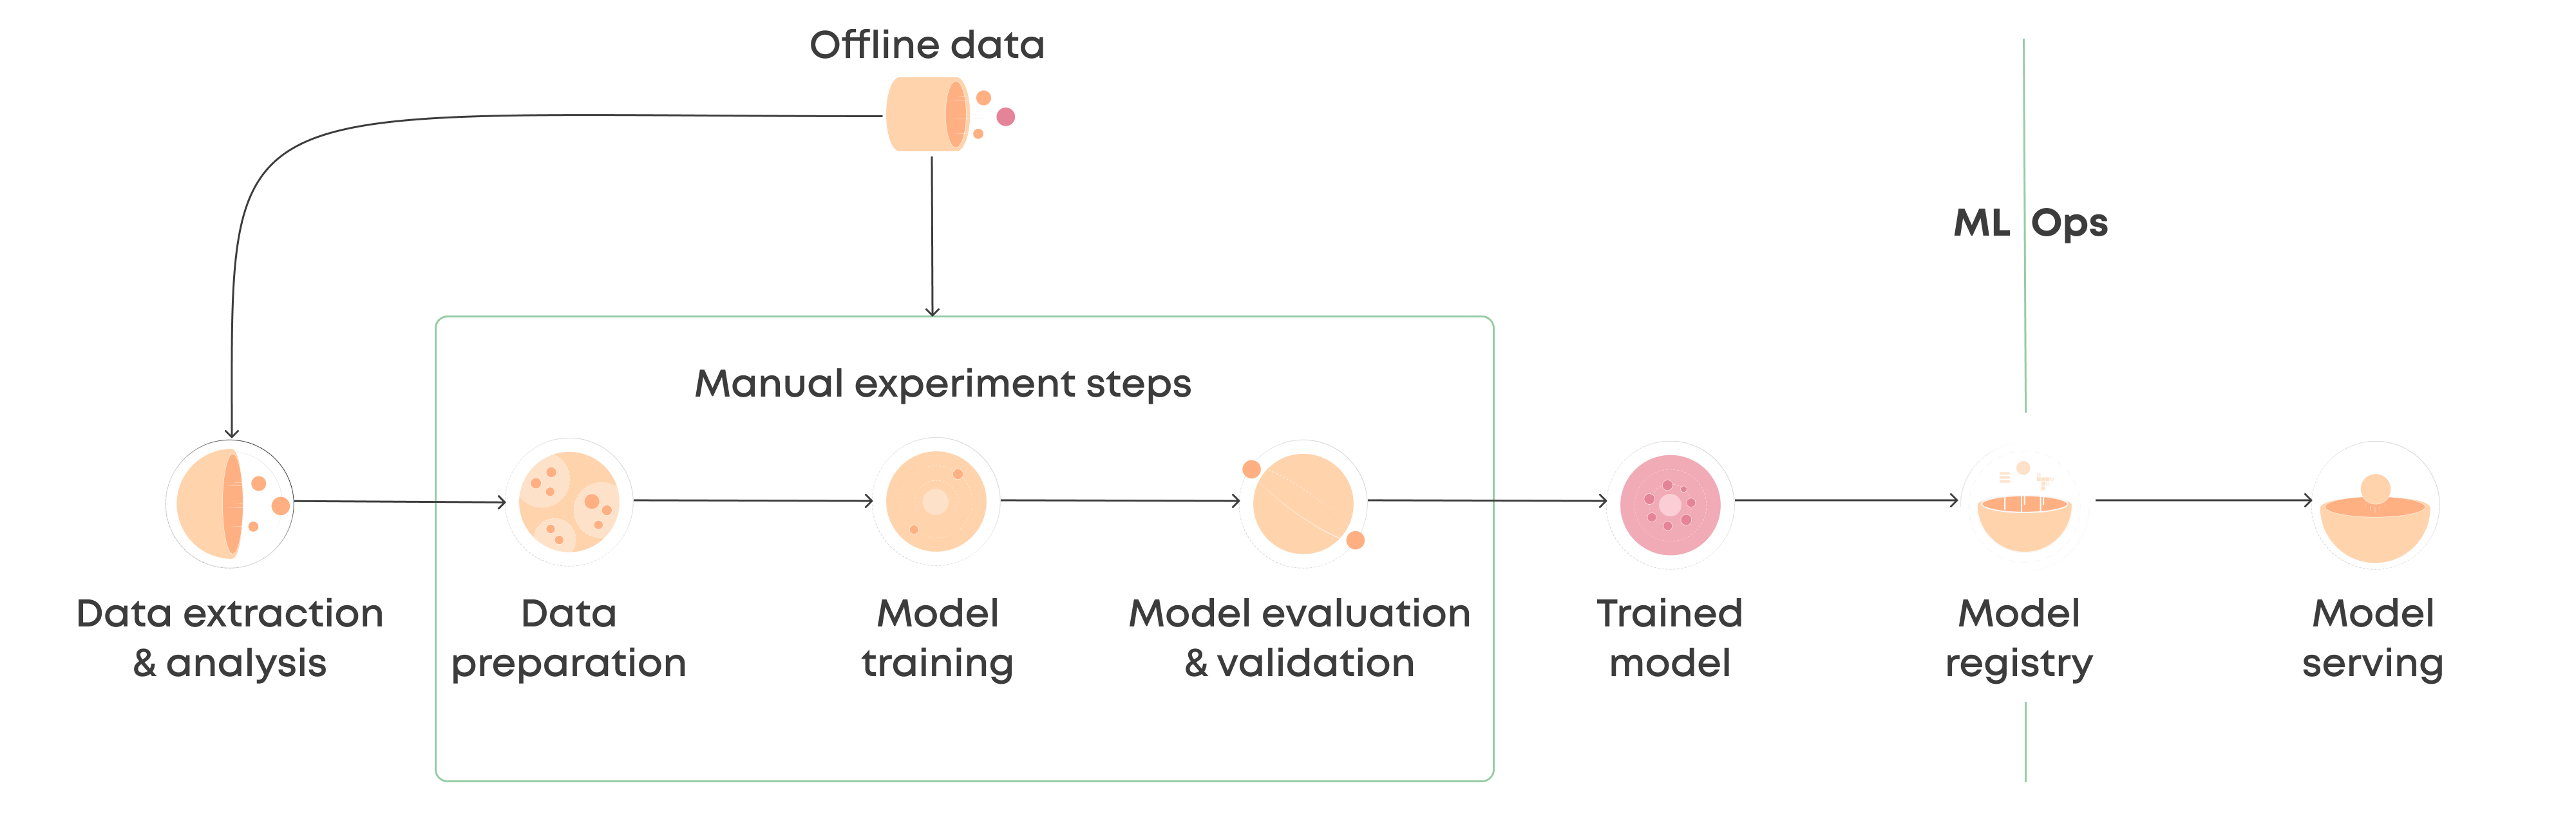

Using pipelines in machine learning workflows is indeed a critical skill, especially when it comes to deploying and testing complex models with preprocessing steps. Pipelines provide a convenient way to organize and encapsulate the data preprocessing and modeling code, making it easier to manage and maintain the workflow.

In a machine learning context, a pipeline is a sequence of data processing steps, where each step is a transformation or a model. The output of one step is passed as input to the next step, creating a streamlined workflow. Pipelines are particularly useful because they allow us to treat the entire bundle as a single entity, simplifying the process of deploying and testing models.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the IRIS dataset
iris = load_iris()

# Split the dataset into features (X) and labels (y)
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Train set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTest set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)



Train set shapes:
X_train: (120, 4)
y_train: (120,)

Test set shapes:
X_test: (30, 4)
y_test: (30,)


In [11]:
X_train

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2],
       [6.3, 2.5, 5. , 1.9],
       [6.4, 3.2, 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 2.7, 5.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3.1, 4.7, 1.5],
       [5.4, 3.9, 1.3, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5],
       [5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.8, 2.7, 4.1, 1. ],
       [5.2, 3.4, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [5. , 2. , 3.5, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the IRIS dataset
iris = load_iris()

# Split the dataset into features (X) and labels (y)
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the pipeline by combining the preprocessing and modeling steps
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict using the fitted pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 1.0


In [27]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"osandalelum","key":"34823093a6179617a038db115c38bd05"}'}

In [28]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [33]:
!kaggle competitions download -c melbourne-airbnb-open-data


401 - Unauthorized


In [31]:
from zipfile import ZipFile

file_name = 'melbourne-airbnb-open-data.zip'  # The file is your dataset exact name

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    extracted_files = zip.namelist()  # Get a list of the extracted filenames
    print('Extracted Files:')
    for extracted_file in extracted_files:
        print(extracted_file)

print('Extraction complete')



FileNotFoundError: ignored

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

filepath = 'data/melbourne_data/melb_data.csv'
melbourne_data = pd.read_csv(filepath)

def plot_missing(df):
    # Find columns having missing values and count
    missing = df.isnull().sum()
    missing = missing[missing > 0]

    # Plot missing values by count
    missing.plot.bar(figsize=(16,5))
    plt.xlabel('Columns with missing values')
    plt.ylabel('Count')

    msno.matrix(df=df, figsize=(16,5), color=(0,0.2,1))

plot_missing(melbourne_data)


FileNotFoundError: ignored